In this notebook, we will calculate key descriptive statistics for the unprocessed version of our dataset, including the average number of articles published per day and per month. 

# dpa

In [1]:
import os
import pandas as pd
from ast import literal_eval

# Set the path variable to point to the 'newspaper_data_processing' directory, which is located in the same 
# parent directory as 'newspaper_analysis'. This is the repository used for data pre-processing.
path = os.getcwd().replace('\\newspaper_analysis\\data', '') + '\\newspaper_data_processing'

# Load the raw 'dpa' dataset from a CSV file.
dpa = pd.read_csv(path + '\\dpa\\' + 'dpa_raw.csv', encoding = 'utf-8', index_col = 0,  keep_default_na=False,
                   dtype = {'rubrics': 'str', 
                            'source': 'str',
                            'keywords': 'str',
                            'title': 'str',
                            'city': 'str',
                            'genre': 'str',
                            'wordcount': 'str'},
                  converters = {'paragraphs': literal_eval})

First, we will calculate the average number of articles published per day and per month to understand the publication frequency within our dataset.

In [2]:
# Create a 'date' column in the dpa DataFrame
dpa['date'] = pd.to_datetime(dpa[['year', 'month', 'day']])

# Convert 'date' column to datetime
dpa['date'] = pd.to_datetime(dpa['date'])

# Create a 'weekday' column (Monday=0, Sunday=6)
dpa['weekday'] = dpa['date'].dt.dayofweek

# Calculate the average number of articles published per day
average_per_day_dpa = dpa.groupby(dpa['date'].dt.date)['texts'].count().mean()

# Calculate the average number of articles published per month
# This groups by year and month to get the total articles per month, then calculates the mean
average_per_month_dpa = dpa.groupby(['year', 'month'])['texts'].count().mean()

print("Average number of articles published per day:", average_per_day_dpa)
print("Average number of articles published per month:", average_per_month_dpa)

Average number of articles published per day: 737.1797027766914
Average number of articles published per month: 22373.513353115726


Next, we will calculate the average number of articles published on working days versus the weekend to identify any differences in publication patterns.

In [3]:
# Calculate the average number of articles published on Saturday (weekday=5)
average_saturday_dpa = dpa[dpa['weekday'] == 5]['texts'].count() / len(dpa[dpa['weekday'] == 5]['date'].dt.date.unique())

# Calculate the average number of articles published on Sunday (weekday=6)
average_sunday_dpa = dpa[dpa['weekday'] == 6]['texts'].count() / len(dpa[dpa['weekday'] == 6]['date'].dt.date.unique())

# Filter for working days (Monday=0 to Friday=4)
working_days_df = dpa[dpa['weekday'].isin(range(0, 5))]

# Calculate the total number of articles published on working days
# Then divide by the number of unique working days to get the average
average_working_day_dpa = working_days_df['texts'].count() / len(working_days_df['date'].dt.date.unique())

print("Average number of articles published on Saturday:", average_saturday_dpa)
print("Average number of articles published on Sunday:", average_sunday_dpa)
print("Average number of articles published on a working day:", average_working_day_dpa)

Average number of articles published on Saturday: 196.709787816564
Average number of articles published on Sunday: 346.17864476386035
Average number of articles published on a working day: 923.4483985765124


Now, we will visualize the publishing frequency by plotting the number of articles published per day, incorporating a 30-day moving average to smooth out short-term fluctuations.

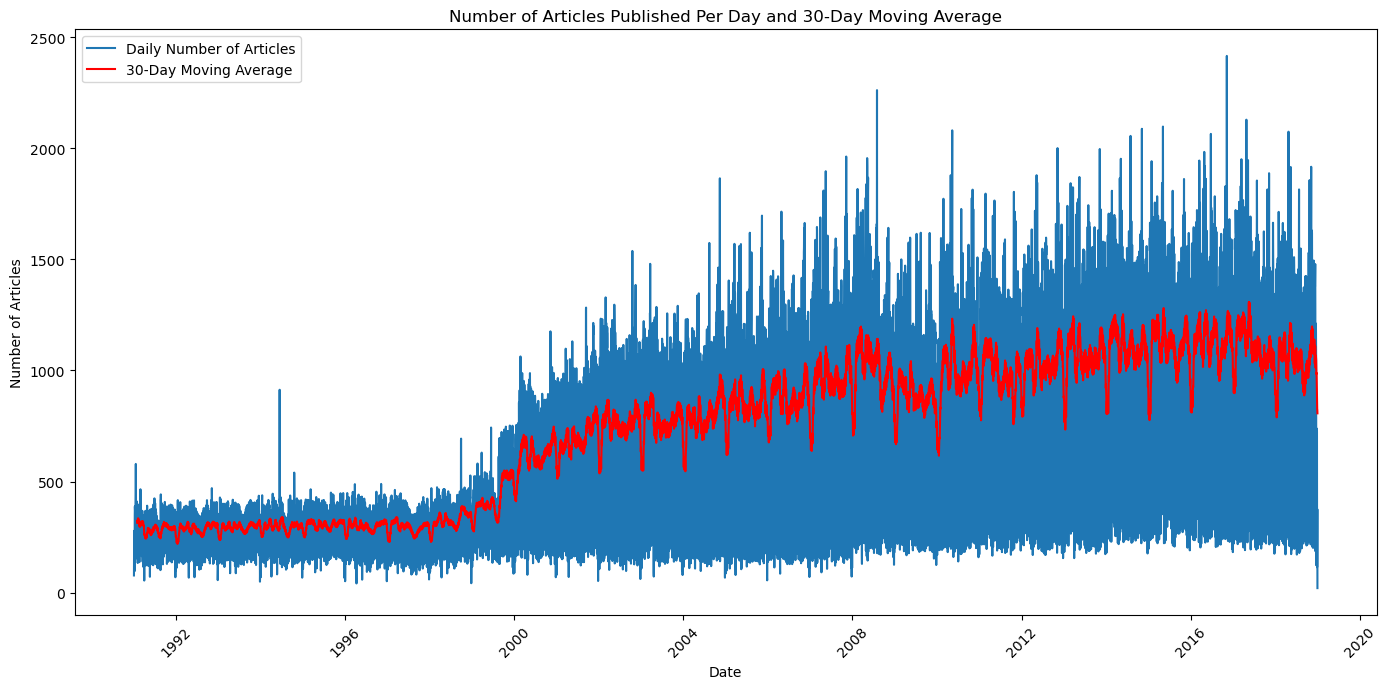

In [4]:
import matplotlib.pyplot as plt

# Aggregate data by date to count articles published each day
daily_count_dpa = dpa.groupby(dpa['date'].dt.date).size()

# Calculate the 30-day moving average
ma_dpa = daily_count_dpa.rolling(window=30).mean()

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better visibility
plt.plot(daily_count_dpa.index, daily_count_dpa, label='Daily Number of Articles')
plt.plot(ma_dpa.index, ma_dpa, label='30-Day Moving Average', color='red')

# Enhance the plot
plt.title('Number of Articles Published Per Day and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

# Show the plot
plt.show()

# SZ

In [5]:
# Load the raw 'SZ' dataset, including regional news, from a CSV file.
sz = pd.read_csv(path + '\\SZ\\' + 'sz_raw_with_regional_news.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'newspaper_2': 'str',
                                                                                                 'quelle_texts': 'str',
                                                                                                 'page': 'str',
                                                                                                 'rubrics': 'str'})
sz.page = sz.page.fillna('')
sz.newspaper = sz.newspaper.fillna('')
sz.newspaper_2 = sz.newspaper_2.fillna('')
sz.rubrics = sz.rubrics.fillna('')
sz.quelle_texts = sz.quelle_texts.fillna('')

In [6]:
# Create a 'date' column in the sz DataFrame
sz['date'] = pd.to_datetime(sz[['year', 'month', 'day']])

# Convert 'date' column to datetime
sz['date'] = pd.to_datetime(sz['date'])

# Create a 'weekday' column (Monday=0, Sunday=6)
sz['weekday'] = sz['date'].dt.dayofweek

# Calculate the average number of articles published per day
average_per_day_sz = sz.groupby(sz['date'].dt.date)['texts'].count().mean()

# Calculate the average number of articles published per month
# This groups by year and month to get the total articles per month, then calculates the mean
average_per_month_sz = sz.groupby(['year', 'month'])['texts'].count().mean()

print("Average number of articles published per day:", average_per_day_sz)
print("Average number of articles published per month:", average_per_month_sz)

Average number of articles published per day: 470.9283249269976
Average number of articles published per month: 11748.258278145695


In [7]:
# Calculate the average number of articles published on Saturday (weekday=5)
average_saturday_sz = sz[sz['weekday'] == 5]['texts'].count() / len(sz[sz['weekday'] == 5]['date'].dt.date.unique())

# Filter for working days (Monday=0 to Friday=4)
working_days_df = sz[sz['weekday'].isin(range(0, 5))]

# Calculate the total number of articles published on working days
# Then divide by the number of unique working days to get the average
average_working_day_sz = working_days_df['texts'].count() / len(working_days_df['date'].dt.date.unique())

print("Average number of articles published on Saturday:", average_saturday_sz)
print("Average number of articles published on a working day:", average_working_day_sz)

Average number of articles published on Saturday: 505.84301412872844
Average number of articles published on a working day: 465.92038523274476


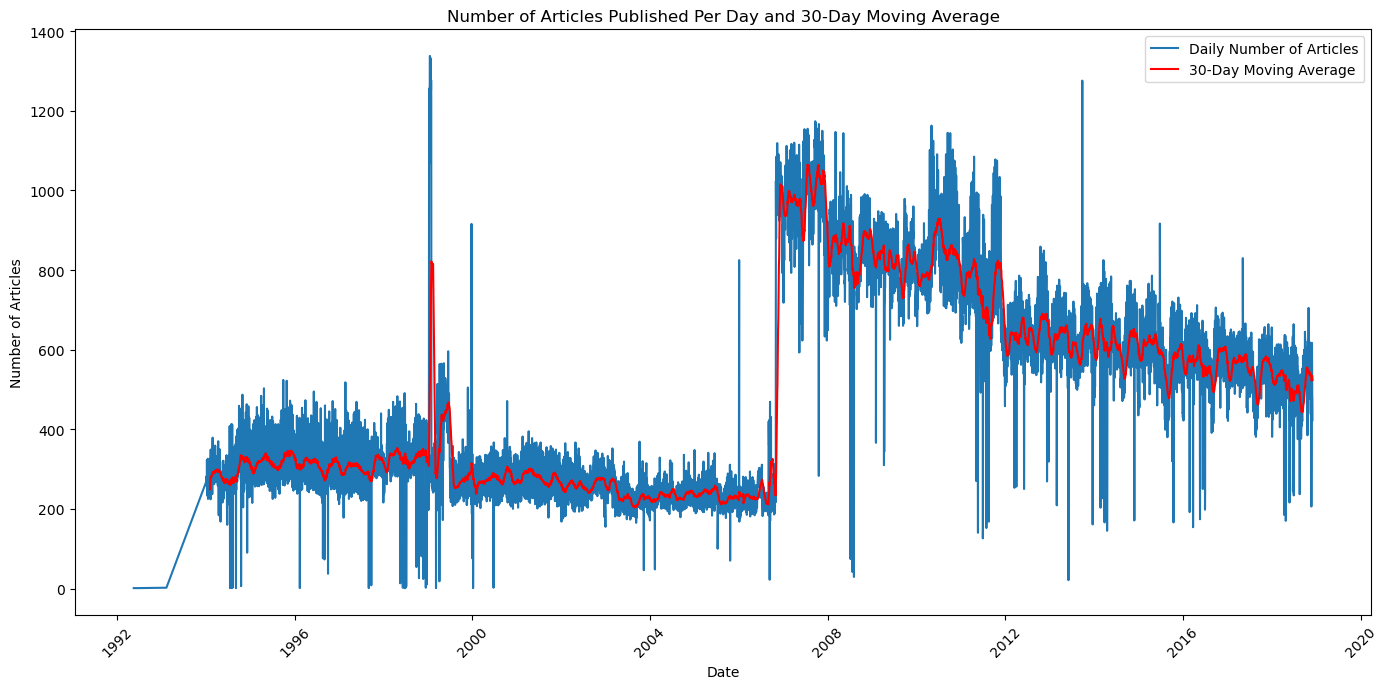

In [8]:
# Aggregate data by date to count articles published each day
daily_count_sz = sz.groupby(sz['date'].dt.date).size()

# Calculate the 30-day moving average
ma_sz = daily_count_sz.rolling(window=30).mean()

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better visibility
plt.plot(daily_count_sz.index, daily_count_sz, label='Daily Number of Articles')
plt.plot(ma_sz.index, ma_sz, label='30-Day Moving Average', color='red')

# Enhance the plot
plt.title('Number of Articles Published Per Day and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

# Show the plot
plt.show()

# Handelsblatt

In [9]:
# Load the raw 'Handelsblatt' dataset from a CSV file.
hb = pd.read_csv(path + '\\Handelsblatt\\' + 'hb_raw.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'kicker': 'str',
                                                                                                 'page': 'str',
                                                                                                 'series_title': 'str',
                                                                                                 'rubrics': 'str'})
hb.page = hb.page.fillna('')
hb.series_title = hb.series_title.fillna('')
hb.kicker = hb.kicker.fillna('')
hb.rubrics = hb.rubrics.fillna('')

In [10]:
# Create a 'date' column in the hb DataFrame
hb['date'] = pd.to_datetime(hb[['year', 'month', 'day']])

# Convert 'date' column to datetime
hb['date'] = pd.to_datetime(hb['date'])

# Create a 'weekday' column (Monday=0, Sunday=6)
hb['weekday'] = hb['date'].dt.dayofweek

# Calculate the average number of articles published per day
average_per_day_hb = hb.groupby(hb['date'].dt.date)['texts'].count().mean()

# Calculate the average number of articles published per month
# This groups by year and month to get the total articles per month, then calculates the mean
average_per_month_hb = hb.groupby(['year', 'month'])['texts'].count().mean()

print("Average number of articles published per day:", average_per_day_hb)
print("Average number of articles published per month:", average_per_month_hb)

Average number of articles published per day: 156.98302913864873
Average number of articles published per month: 3279.3177257525085


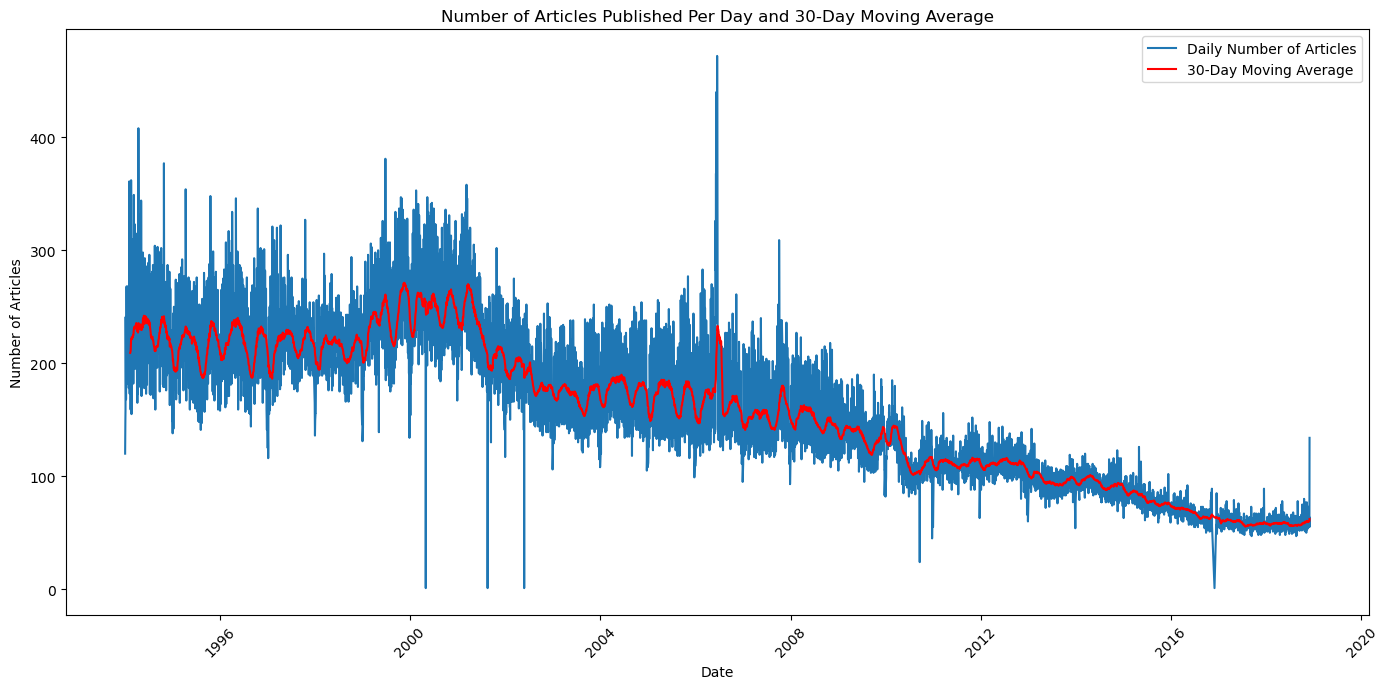

In [11]:
# Aggregate data by date to count articles published each day
daily_count_hb = hb.groupby(hb['date'].dt.date).size()

# Calculate the 30-day moving average
ma_hb = daily_count_hb.rolling(window=30).mean()

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better visibility
plt.plot(daily_count_hb.index, daily_count_hb, label='Daily Number of Articles')
plt.plot(ma_hb.index, ma_hb, label='30-Day Moving Average', color='red')

# Enhance the plot
plt.title('Number of Articles Published Per Day and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

# Show the plot
plt.show()

# Welt

In [12]:
# Load the raw 'Welt' dataset from a CSV file.
welt = pd.read_csv(path + '\\Welt\\' + 'welt_raw.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'rubrics': 'str',
                                                                                                 'title': 'str'})
welt.title = welt.title.fillna('')
welt.rubrics = welt.rubrics.fillna('') 

We exclude periods from March 1999 to October 2000 and from January 2004 to April 2004 due to insufficient data availability in LexisNexis, with fewer than 100 articles per month and no articles at all from January to October 2000.

In [13]:
# Create a 'date' column in the welt DataFrame
welt['date'] = pd.to_datetime(welt[['year', 'month', 'day']])

# Convert 'date' column to datetime
welt['date'] = pd.to_datetime(welt['date'])

# Create a 'weekday' column (Monday=0, Sunday=6)
welt['weekday'] = welt['date'].dt.dayofweek

# Excluding specific time periods
exclusion_periods = [
    ('1999-03-01', '2000-10-31'),
    ('2004-01-01', '2004-04-30')
]

for start, end in exclusion_periods:
    start_date = pd.Timestamp(start)
    end_date = pd.Timestamp(end)
    welt = welt[~((welt['date'] >= start_date) & (welt['date'] <= end_date))]

# Calculate the average number of articles published per day
average_per_day_welt = welt.groupby(welt['date'].dt.date)['texts'].count().mean()

# Calculate the average number of articles published per month
# This groups by year and month to get the total articles per month, then calculates the mean
average_per_month_welt = welt.groupby(['year', 'month'])['texts'].count().mean()

print("Average number of articles published per day:", average_per_day_welt)
print("Average number of articles published per month:", average_per_month_welt)

Average number of articles published per day: 38.08795485503016
Average number of articles published per month: 964.2068965517242


In [14]:
# Calculate the average number of articles published on Saturday (weekday=5)
average_saturday_welt = welt[welt['weekday'] == 5]['texts'].count() / len(welt[welt['weekday'] == 5]['date'].dt.date.unique())

# Filter for working days (Monday=0 to Friday=4)
working_days_df = welt[welt['weekday'].isin(range(0, 5))]

# Calculate the total number of articles published on working days
# Then divide by the number of unique working days to get the average
average_working_day_welt = working_days_df['texts'].count() / len(working_days_df['date'].dt.date.unique())

print("Average number of articles published on Saturday:", average_saturday_welt)
print("Average number of articles published on a working day:", average_working_day_welt)

Average number of articles published on Saturday: 38.31329479768786
Average number of articles published on a working day: 38.10863444392304


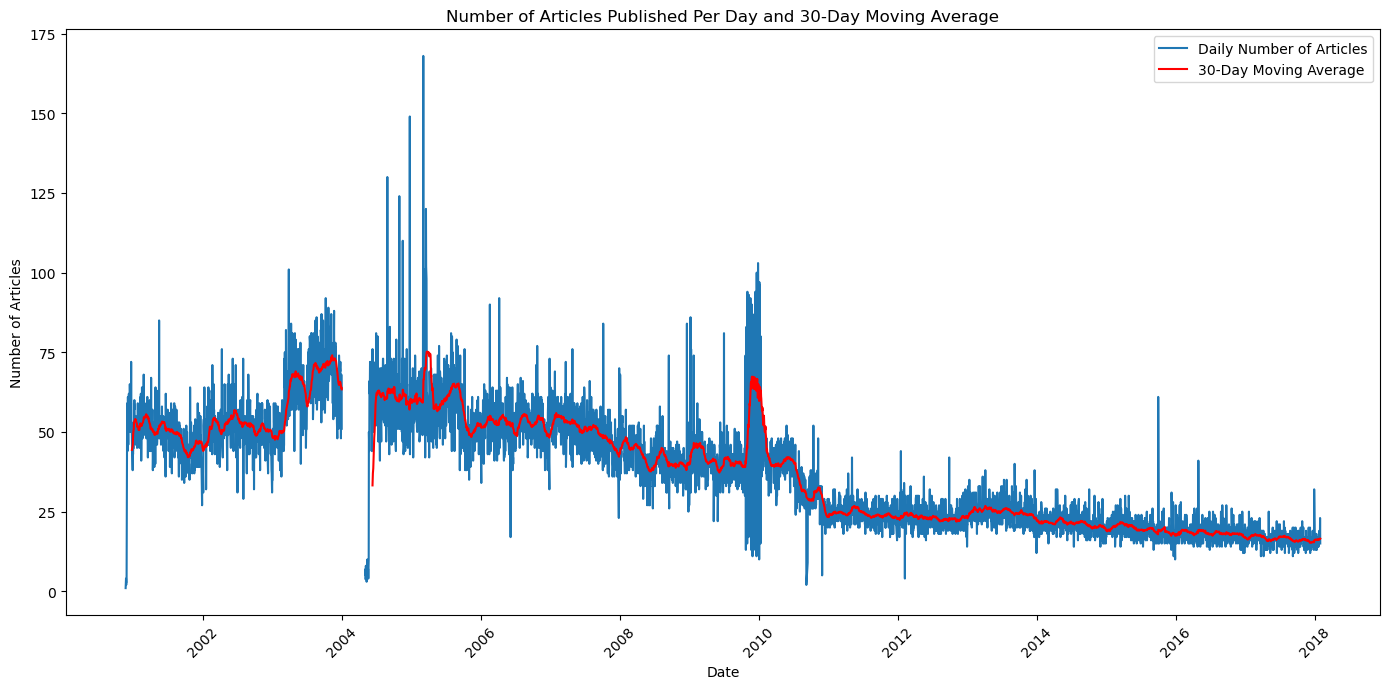

In [15]:
periods = [
    ('2000-11-20', '2003-12-31'),
    ('2004-05-01', '2018-01-31')
]

plt.figure(figsize=(14, 7))

# Get the first color from the current color cycle
default_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

for start, end in periods:
    # Filter the dataset for each period
    period_df = welt[(welt['date'] >= pd.Timestamp(start)) & (welt['date'] <= pd.Timestamp(end))]
    
    # Calculate the daily count and moving average for this period
    daily_count_period = period_df.groupby(period_df['date'].dt.date).size()
    ma_period = daily_count_period.rolling(window=30).mean()
    
    # Plot each period separately
    plt.plot(daily_count_period.index, daily_count_period, label='Daily Number of Articles', color = default_color)
    plt.plot(ma_period.index, ma_period, color='red', label='30-Day Moving Average')

# Enhance the plot
plt.title('Number of Articles Published Per Day and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()

# Adjust the legend. Since we're plotting the same labels for each period, let's clean this up.
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # This removes duplicate labels/handles
plt.legend(by_label.values(), by_label.keys())

# Show the plot
plt.show()

# Comparative Analysis of 30-Day Moving Averages Across Datasets

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


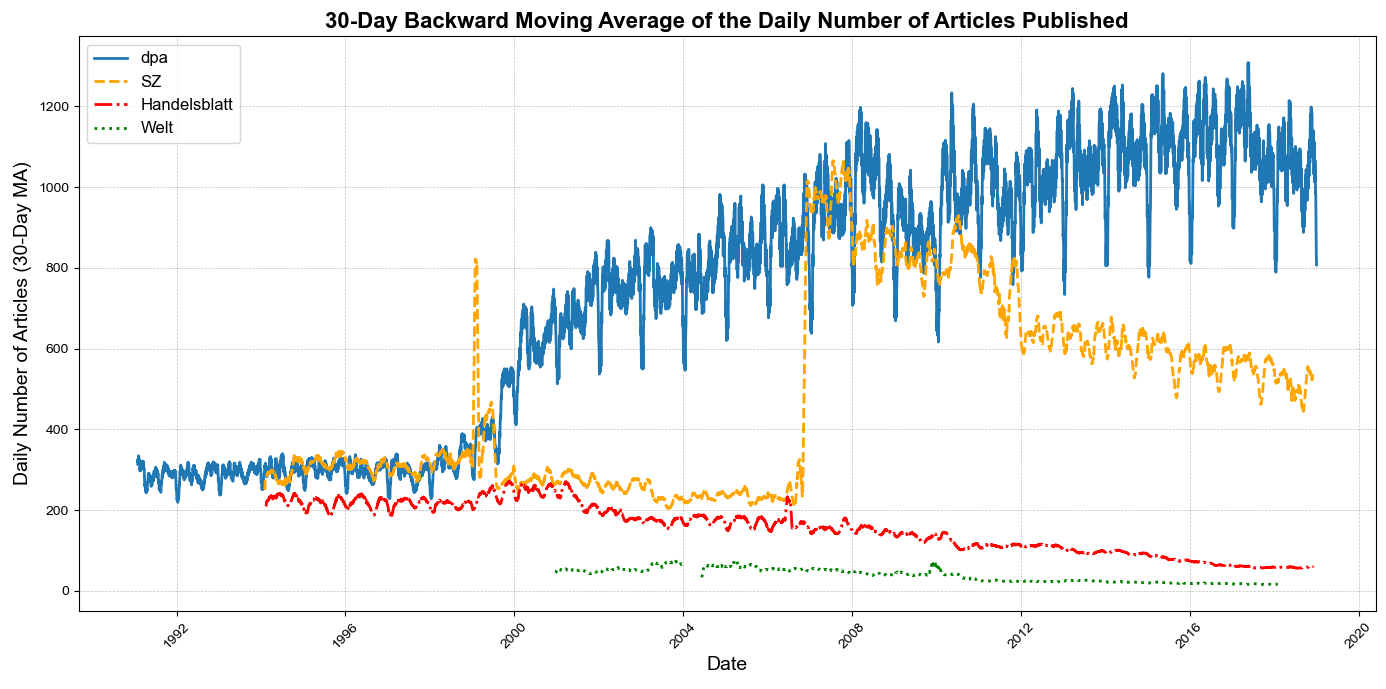

In [16]:
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(14, 7))

# Plot the 30-day moving average for dpa, SZ, and Handelsblatt
plt.plot(ma_dpa.index, ma_dpa, label='dpa', linewidth=2)
plt.plot(ma_sz.index, ma_sz, label='SZ', linewidth=2, linestyle='dashed', color='orange')
plt.plot(ma_hb.index, ma_hb, label='Handelsblatt', linewidth=2, linestyle='dashdot', color='red')

# Plot each period for Welt separately to handle the gap
for start, end in periods:
    period_df = welt[(welt['date'] >= pd.Timestamp(start)) & (welt['date'] <= pd.Timestamp(end))]
    daily_count_period = period_df.groupby(period_df['date'].dt.date).size()
    ma_period = daily_count_period.rolling(window=30).mean()
    plt.plot(ma_period.index, ma_period, label='Welt' if start == periods[0][0] else "__nolegend__", color='green', linewidth=2, linestyle='dotted')

# Enhance the plot with a title, axis labels, and legend
plt.title('30-Day Backward Moving Average of the Daily Number of Articles Published', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Number of Articles (30-Day MA)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')

# Improve readability of the x-axis labels
plt.xticks(rotation=45)

# Set grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Tighten the layout to make full use of space
plt.tight_layout()

# Apply a sophisticated look with a predefined style
plt.style.use('seaborn-darkgrid')

# Save the plot
plt.savefig('daily_publications_across_datasets_no_processing.eps', format='eps')
plt.savefig('daily_publications_across_datasets_no_processing.png', format='png')

# Show the plot
plt.show()

# Combined dataset

In [17]:
# Keep only the article texts and their respective publication dates.
dpa = dpa[['texts', 'day', 'month', 'year', 'date']]

# Add 'source' column with value 'dpa' for all rows
dpa['source'] = 'dpa'

# Keep only the article texts and their respective publication dates.
sz = sz[['texts', 'day', 'month', 'year', 'date']]

# Add 'source' column with value 'SZ' for all rows
sz['source'] = 'SZ'

# Keep only the article texts and their respective publication dates.
hb = hb[['texts', 'day', 'month', 'year', 'date']]

# Add 'source' column with value 'Handelsblatt' for all rows
hb['source'] = 'Handelsblatt'

# Load the raw 'Welt' dataset from a CSV file.
welt = pd.read_csv(path + '\\Welt\\' + 'welt_raw.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'rubrics': 'str',
                                                                                                 'title': 'str'})
welt.title = welt.title.fillna('')
welt.rubrics = welt.rubrics.fillna('') 

# Create a 'date' column in the welt DataFrame
welt['date'] = pd.to_datetime(welt[['year', 'month', 'day']])

# Convert 'date' column to datetime
welt['date'] = pd.to_datetime(welt['date'])

# Keep only the article texts and their respective publication dates.
welt = welt[['texts', 'day', 'month', 'year', 'date']]

# Add 'source' column with value 'Welt' for all rows
welt['source'] = 'Welt'

# Concatenate the 'dpa', 'sz', 'hb', and 'welt' DataFrames into a single DataFrame 'data'.
data = pd.concat([dpa, sz, hb, welt])

# The number of articles in the final dataset.
print(len(data))

# Sort the data in chronological order.
data = data.sort_values(['year', 'month', 'day'], ascending=[True, True, True])
# Reset the index of the DataFrame
data.reset_index(inplace=True, drop=True)

12364250


In [18]:
# Calculate the average number of articles published per day
average_per_day_combined = data.groupby(data['date'].dt.date)['texts'].count().mean()

# Calculate the average number of articles published per month
# This groups by year and month to get the total articles per month, then calculates the mean
average_per_month_combined = data.groupby(['year', 'month'])['texts'].count().mean()

print("Average number of articles published per day:", average_per_day_combined)
print("Average number of articles published per month:", average_per_month_combined)

Average number of articles published per day: 1199.1895776300353
Average number of articles published per month: 36395.58160237389
